## Data Cleaning and merging dataframes

In this notebook, we'll work with `movie_basics` and `movie_ratings` tables from `'im.db'`. As well as `'tn.movie_budget.csv'`.

Before we can get going, we'll need to import the relevant packages and conncet to the database.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import sqlite3
conn = sqlite3.connect('Db/im.db')

In this notebook we'll focus on the `movie_basics` and `movie_ratings`.

## Compared to the Individual Tables:

### `movie_basics` Table:

In [2]:
q = """
SELECT *
FROM movie_basics
"""
pd.read_sql(q, conn).head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### `movie_ratings` Table:

In [3]:
q = """
SELECT *
FROM movie_ratings
"""
pd.read_sql(q, conn).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Displaying movie_basics Along with movie_ratings

Since we need to generate a table that includes details about ` movie_basics`  and ` movie_ratings`, we would need to take data from multiple tables in a single statement using a concise way to join the tables, the `USING` clause. Which in this case is `movie_id`. Again, this only works if the column is **identically named** for both tables.

Then we assign the result of the querry to a variable names `df`, which is a dataframe. 

In [4]:
q = """
SELECT
    movie_id, 
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
"""
df = pd.read_sql(q, conn)

To get a concise summary of the dataframe, you can use `.info()`: 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


## Nan (Not a Number):
When working with datasets, it is common to have missing or `NaN (Not a Number)` values. In order to understand the extent of missing data in a dataset, you can use the `.isna()` method to identify where the `NaN` values are located. Taking the `.sum()` of the `.isna(`) method will return the total number of NaN values in the dataset broken down by column.

In [6]:
df.isna().sum()

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

Since the `'genre'` is a categorical data and the missing values accounts for only 1 % of our data we decided to drop the rows that contained null values using the built-in function `.dropna()`. Since we are creating a new df, a new name will be given to it as `df_nonull_genres`.

In [7]:
df_nonull_genres = df.dropna(axis = 0)

Lets display the total number of `NaN` values in the dataset broken down by column.

In [8]:
df_nonull_genres.isna().sum()

movie_id         0
primary_title    0
genres           0
averagerating    0
numvotes         0
dtype: int64

Since, we dont have any other missing data to deal with, lets take a look on the second dataframe.

The second `df` can be found on `'tn.movie_budget.csv'`. Now, let's get started by reading in the data  and storing it the DataFrame `movie_budget`. Afterwárds, lets preview the data.

In [9]:
movie_budget = pd.read_csv('Db/tn.movie_budgets.csv')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


A concise summary will be provided using `.info()`.

In [10]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The above summary contains also the amount of null values brake down by columns. Since we don´t have any we can move into merging `movie_budget`df and `df_nonull_genres` df. 

For doing so, lets print a short preview for both Dataframes. Focus on the column names.

`df_nonull_genres` df:

In [11]:
df_nonull_genres.head(2)

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43


`movie_budget` df:

In [12]:
movie_budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


As you can see, the column which displays the movie title is different in both Dataframes. `df_nonull_genres` uses `'primary_title'`while `movie_budget` uses `'movie'`. 

We need to set them equal to use the column name as a key for merging both Dataframes into one. Will set both columns names as `'movie'`. In this case,  `df_nonull_genres` is the one selected to change its column name. 

In [13]:
df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)

C:\Users\jgonzalezvarguez\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Lets view the column labels of the DataFrame `df_nonull_genres`.

In [14]:
df_nonull_genres.columns

Index(['movie_id', 'movie', 'genres', 'averagerating', 'numvotes'], dtype='object')

As you see, now the column name was changed succesfully. 

## Nan (Not a Number):

The following line of code is performing a merge operation between  `df_nonull_genre`s and `movie_budget`.

The merge is performed based on a common column called `'movie'`, specified by the `on` parameter.

The type of merge used is specified by the how parameter, which in this case is set to `'left'`, meaning that all the rows from the `df_nonull_genres dataframe` will be kept and any matching rows from the `movie_budget` dataframe will be included. Any non-matching rows from the movie_budget dataframe will have null values in the resulting dataframe.

Finally, a new column called `'im_and_movie_budget'` is added to the resulting merged dataframe, indicating whether a row is present in both dataframes (i.e., 'both'), only in the left dataframe (i.e., 'left_only'), or only in the right dataframe (i.e., 'right_only'). This is specified by the `indicator` parameter.

The resulting dataframe is assigned to the variable `im_movie_budget`. Subsequently, we use `value_counts()` to return a new Series object with the count of unique values of the new column called `'im_and_movie_budget'`.

In [15]:
im_movie_budget = pd.merge(df_nonull_genres ,movie_budget, on='movie', how='left', indicator = 'im_and_movie_budget')
im_movie_budget['im_and_movie_budget'].value_counts()

left_only     70307
both           2867
right_only        0
Name: im_and_movie_budget, dtype: int64

A sample was taken from Dataframe `im_movie_budget` by selecting rows that has a string value equal to `both`on column `'im_and_movie_budget'`. That sample name is `cleaned_df`.

In [16]:
cleaned_df = im_movie_budget[im_movie_budget['im_and_movie_budget'] == 'both'] 
cleaned_df

,movie_id,movie,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,im_and_movie_budget
16,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,26.0,"Dec 31, 2012","$45,000,000",$0,"$73,706",both
36,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,17.0,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",both
42,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,37.0,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",both
46,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,67.0,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",both
47,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,34.0,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",both
...,...,...,...,...,...,...,...,...,...,...,...
72971,tt9746500,Earth,Documentary,7.3,49,36.0,"Apr 22, 2009","$47,000,000","$32,011,576","$116,773,317",both
73096,tt9851050,Sisters,"Action,Drama",4.7,14,57.0,"Dec 18, 2015","$30,000,000","$87,044,645","$106,030,660",both
73111,tt9861522,Ali,Drama,7.7,79,45.0,"Dec 25, 2001","$109,000,000","$58,183,966","$87,683,966",both
73151,tt9899880,Columbus,Comedy,5.8,5,93.0,"Aug 4, 2017","$700,000","$1,017,107","$1,110,511",both


Lets get a concise summary of the dataframe using `.info()`: 

In [17]:
cleaned_df.isna().sum()

movie_id               0
movie                  0
genres                 0
averagerating          0
numvotes               0
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
im_and_movie_budget    0
dtype: int64

At this point, we are all set to begin with the Eploratory Data Analisis.

# Business Case 1: Genre based on profits

In the first business case, we need to know based on the `genres` and how much money locally and globaly they generated. So in this case we are analizing which `genres` produce more money.

## Identifying genres.

For the beginning, we need to work with the table `movie_basics` of the `im.db` data base,specifically with the columns `primary_title`, `genres` and the `tn.movie_budgets.csv` file with the columns `domestic_gross` and `worldwide_gross`.

We are creating a new dataFrame only using these columns.

In [19]:
#Creating a table with Movie Title, genres and profits
case1_df = cleaned_df.loc[:,['movie','genres','worldwide_gross']]
print(case1_df)

                                 movie                   genres  \
16                          Foodfight!  Action,Animation,Comedy   
36                         On the Road  Adventure,Drama,Romance   
42     The Secret Life of Walter Mitty   Adventure,Comedy,Drama   
46         A Walk Among the Tombstones       Action,Crime,Drama   
47                      Jurassic World  Action,Adventure,Sci-Fi   
...                                ...                      ...   
72971                            Earth              Documentary   
73096                          Sisters             Action,Drama   
73111                              Ali                    Drama   
73151                         Columbus                   Comedy   
73164                      Unstoppable              Documentary   

      worldwide_gross  
16            $73,706  
36         $9,313,302  
42       $187,861,183  
46        $62,108,587  
47     $1,648,854,864  
...               ...  
72971    $116,773,317  
730

## Separating genres and counting them

Checking the DataFrame above we notice that some movie have more than 1 genre, so we need to count each one for knowing the total revenue of each genre.

So we need to serpate eache genera and put it into a new column.

In [20]:
#Dividing all of the genres
genres_cols = cleaned_df['genres'].str.split(',', expand=True)
genres_cols.columns = ['genre1','genre2','genre3']
counts1 = genres_cols['genre1'].value_counts()
counts2 = genres_cols['genre2'].value_counts()
counts3 = genres_cols['genre3'].value_counts()
total_counts = counts1.add(counts2, fill_value=0).add(counts3, fill_value=0)
total_counts

Action          630.0
Adventure       448.0
Animation       130.0
Biography       195.0
Comedy          758.0
Crime           362.0
Documentary     204.0
Drama          1491.0
Family          144.0
Fantasy         175.0
History          71.0
Horror          360.0
Music            72.0
Musical          22.0
Mystery         223.0
News              3.0
Romance         326.0
Sci-Fi          204.0
Sport            62.0
Thriller        509.0
War              39.0
Western          16.0
dtype: float64

Now, we combine the `cleaned_df` with the new three columns for each genre into a new dataFrame called `case1_vs_df`

In [21]:
#Creating a new table with number of gender, 
case1_vs_df = pd.merge(cleaned_df[['movie','domestic_gross','worldwide_gross','production_budget']], genres_cols[['genre1','genre2','genre3']], left_index = True, right_index=True)
case1_vs_df

,movie,domestic_gross,worldwide_gross,production_budget,genre1,genre2,genre3
16,Foodfight!,$0,"$73,706","$45,000,000",Action,Animation,Comedy
36,On the Road,"$720,828","$9,313,302","$25,000,000",Adventure,Drama,Romance
42,The Secret Life of Walter Mitty,"$58,236,838","$187,861,183","$91,000,000",Adventure,Comedy,Drama
46,A Walk Among the Tombstones,"$26,017,685","$62,108,587","$28,000,000",Action,Crime,Drama
47,Jurassic World,"$652,270,625","$1,648,854,864","$215,000,000",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...
72971,Earth,"$32,011,576","$116,773,317","$47,000,000",Documentary,None,None
73096,Sisters,"$87,044,645","$106,030,660","$30,000,000",Action,Drama,None
73111,Ali,"$58,183,966","$87,683,966","$109,000,000",Drama,None,None
73151,Columbus,"$1,017,107","$1,110,511","$700,000",Comedy,None,None


To work with the `domestic_gross` and `worldwide_gross` is necessary to take only the numerical part, so we need to delete the "$" and "," simbols

In [22]:
#Delete the $ and ,
case1_vs_df['domestic_gross'] = case1_vs_df['domestic_gross'].replace({'\$':'',',':''},regex=True)
case1_vs_df['worldwide_gross'] = case1_vs_df['worldwide_gross'].replace({'\$':'',',':''},regex=True)
case1_vs_df['production_budget'] = case1_vs_df['production_budget'].replace({'\$':'',',':''},regex=True)
case1_vs_df

,movie,domestic_gross,worldwide_gross,production_budget,genre1,genre2,genre3
16,Foodfight!,0,73706,45000000,Action,Animation,Comedy
36,On the Road,720828,9313302,25000000,Adventure,Drama,Romance
42,The Secret Life of Walter Mitty,58236838,187861183,91000000,Adventure,Comedy,Drama
46,A Walk Among the Tombstones,26017685,62108587,28000000,Action,Crime,Drama
47,Jurassic World,652270625,1648854864,215000000,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...
72971,Earth,32011576,116773317,47000000,Documentary,None,None
73096,Sisters,87044645,106030660,30000000,Action,Drama,None
73111,Ali,58183966,87683966,109000000,Drama,None,None
73151,Columbus,1017107,1110511,700000,Comedy,None,None


## Having all the totals

We need to convert first the data type of `domestic_gross`, `worldwide_gross` and `production_budget` columns. Then, we need to add the domestic rows values every time that a movie have some genre to have the total of all the profits and all the production budget of every genre.

In [23]:

case1_vs_df['domestic_gross'] = case1_vs_df['domestic_gross'].astype(float)
case1_vs_df['worldwide_gross'] = case1_vs_df['worldwide_gross'].astype(float)
case1_vs_df['production_budget'] = case1_vs_df['production_budget'].astype(float)

totals = {}

for index, row in case1_vs_df.iterrows():
    genres = [row['genre1'], row['genre2'], row['genre3']]
    for genre in genres:
        if genre not in totals:
            totals[genre] = {'domestic_gross': 0, 'worldwide_gross': 0, 'production_budget':0}
        totals[genre]['domestic_gross'] += row['domestic_gross']
        totals[genre]['worldwide_gross'] += row['worldwide_gross']
        totals[genre]['production_budget'] += row['production_budget']

new_df = pd.DataFrame(totals).T.reset_index().rename(columns={'index': 'genre'})
new_df['genre'] = new_df['genre'].astype('string')
new_df['genre'].fillna('Other',inplace=True)

new_df

,genre,domestic_gross,worldwide_gross,production_budget
0,Action,4.468698e+10,1.199860e+11,4.077893e+10
1,Animation,1.505947e+10,4.129402e+10,1.116779e+10
2,Comedy,3.608269e+10,8.045373e+10,2.533618e+10
3,Adventure,4.796407e+10,1.343977e+11,4.090776e+10
4,Drama,4.315093e+10,9.143296e+10,3.513053e+10
5,Romance,9.593389e+09,2.055086e+10,6.616127e+09
6,Crime,1.106037e+10,2.411083e+10,9.946593e+09
7,Sci-Fi,1.860459e+10,5.009867e+10,1.431784e+10
8,Other,6.341734e+10,1.343814e+11,4.873818e+10
9,Family,9.971529e+09,2.342681e+10,7.568903e+09


Finally, we want to select only the top 5 genres with more profits because we have a lot of genres, but we only need the most convenient genres and show them in a bar graph.

In [27]:
final_gross = new_df['worldwide_gross'] - new_df['production_budget']
new_df['total_gross'] = final_gross
new_df = new_df.sort_values(by='total_gross', ascending=False)
top_5 = new_df.head(5)
top_5

,genre,domestic_gross,worldwide_gross,production_budget,total_gross
3,Adventure,4.796407e+10,1.343977e+11,4.090776e+10,9.348997e+10
0,Action,4.468698e+10,1.199860e+11,4.077893e+10,7.920712e+10
4,Drama,4.315093e+10,9.143296e+10,3.513053e+10,5.630243e+10
2,Comedy,3.608269e+10,8.045373e+10,2.533618e+10,5.511755e+10
7,Sci-Fi,1.860459e+10,5.009867e+10,1.431784e+10,3.578082e+10


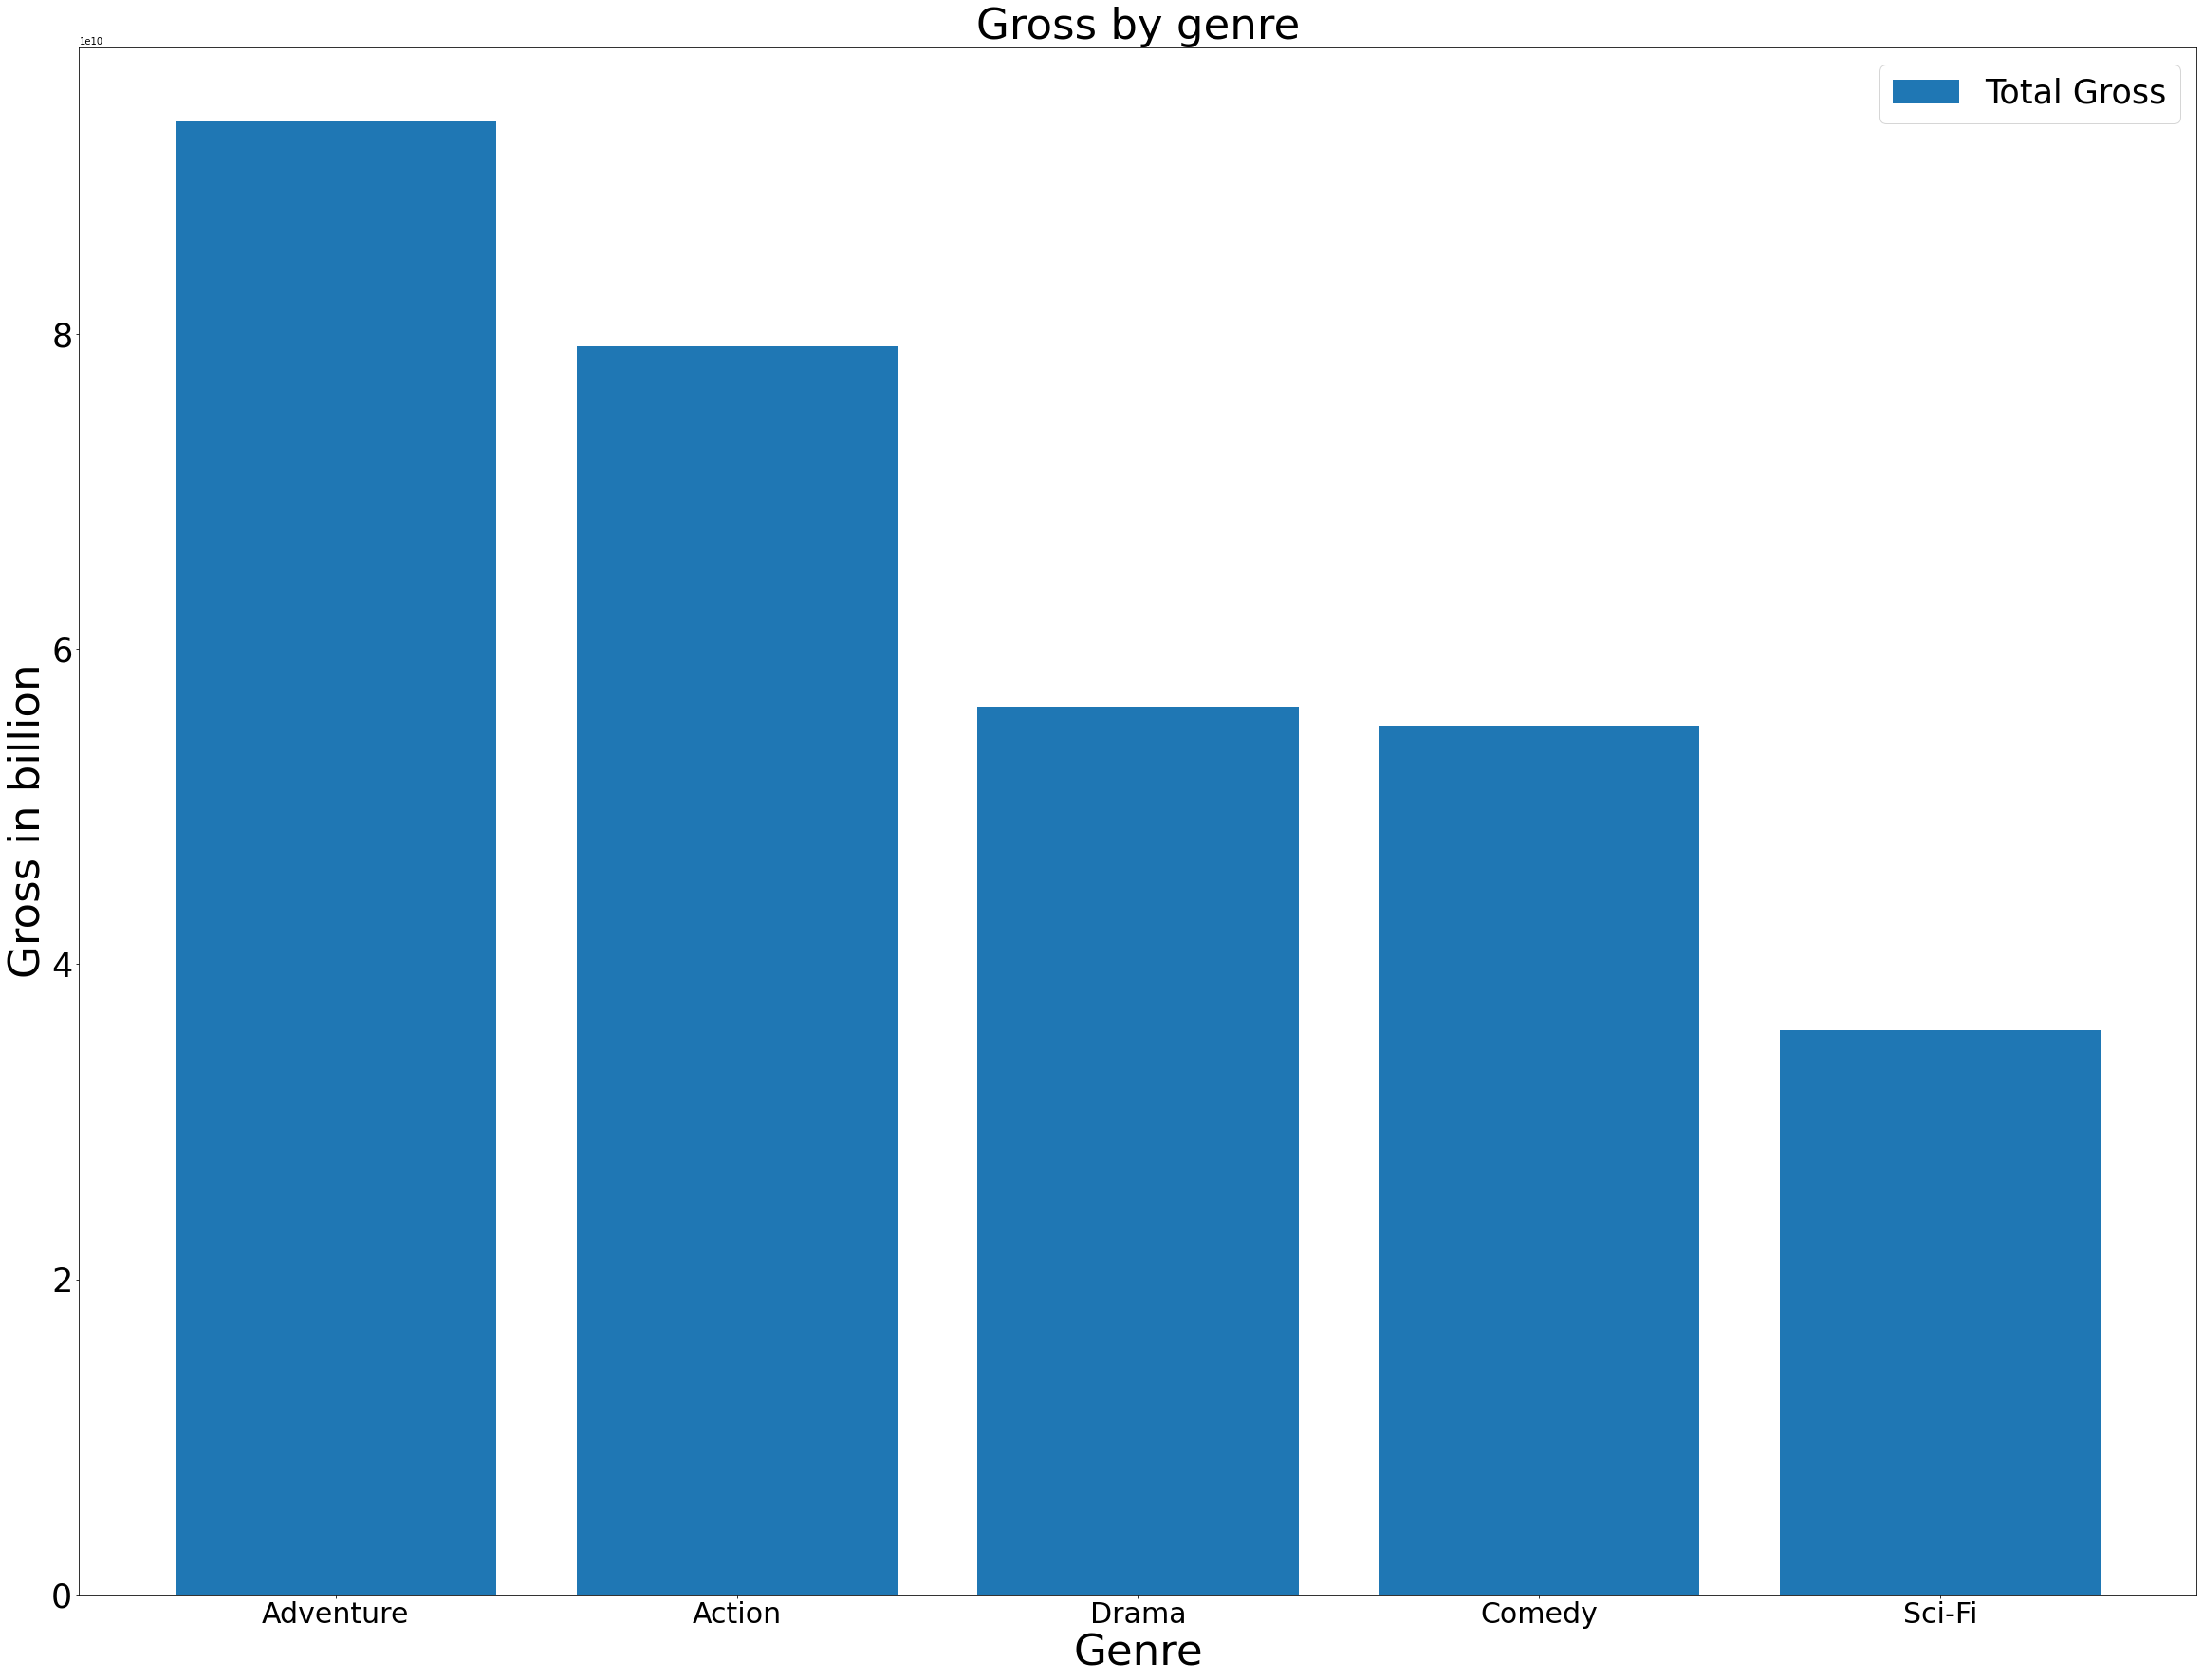

In [33]:
#Creating a bar graph for the case1_vs_df table

#Defining the columns of the x and y axis
new_df = new_df[new_df.genre !='Other']
x = top_5['genre']
y = top_5['total_gross']

#Defining the name of each bar
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=35)
plt.bar(x,y,label='Total Gross')

#Defining name of the labels and title of the bar graph
plt.title('Gross by genre', fontsize=45)
plt.xlabel('Genre', fontsize=45)
plt.ylabel('Gross in billion', fontsize=45)

plt.legend(fontsize=35)
plt.show()


## Conclusion

Checking the bar graph noticing that the genres that produce more money are `Adventure`, `Action` and `Drama`. These three genres generate more money that the other ones.

The conclusion of this business case is that if you want to create a movie that could produce a lot of money are Adventure, Action and Drama genres.